## 회귀로 체중 예측하기
* 건강검진 데이터를 바탕으로 체중 예측하기
* 머신러닝을 통해 데이터를 예측하는 과정은 마치 우리가 기출문제와 정답을 보며 학습을 하고 실제 시험에서 문제를 풀게 되는 과정과 유사합니다. 
* 머신러닝 알고리즘이 문제를 잘 풀 수 있도록 정제된 데이터를 전달해 주어야 좋은 성능을 낼 것입니다.
* 머신러닝 알고리즘이 좋은 성능을 낼 수 있도록 여러 방법으로 체중을 예측해 봅니다.
* 체중은 연속된 수치데이터라고 볼 수 있지만 여기에서는 5Kg 단위로 범주화 되어 있습니다.
* 따라서 분류로 풀어도 되지만 연속된 숫자라 가정하고 회귀로 풀어봅니다.
* 사이킷런 공식 문서를 참고합니다. [Getting Started — scikit-learn documentation](https://scikit-learn.org/stable/getting_started.html)

## 국민건강보험 건강검진 정보는?
* 건강검진정보란 2002년부터 2013년까지의 국민건강보험의 직장가입자와 40세 이상의 피부양자, 세대주인 지역가입자와 40세 이상의 지역가입자의 일반건강검진 결과와 이들 일반건강검진 대상자 중에 만40세와 만66세에 도달한 이들이 받게 되는 생애전환기건강진단 수검이력이 있는 각 연도별 수진자 100만 명에 대한 기본정보(성, 연령대, 시도코드 등)와 검진내역(신장, 체중, 총콜레스테롤, 혈색소 등)으로 구성된 개방데이터이다.

공공데이터 개방서비스( http://nhiss.nhis.or.kr/op/it/index.do )에서도 다운로드 받을 수 있음.

* 건강검진정보(2017) 다운로드 받기 : https://www.data.go.kr/dataset/15007122/fileData.do
* 2018년 데이터로 실습을 하셔도 됩니다. 다만 encoding과 컬럼명이 달라서 2018년 데이터에 맞게 고쳐주시면 됩니다.
* 2018년 외 다른 연도의 데이터로도 실습을 하고자 한다면 컬럼명과 인코딩에 주의해 주세요.

## 필요한 라이브러리 로드

In [1]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드합니다. 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 한글폰트 사용하기

In [2]:
# 한글폰트를 설정해 주지 않으면 그래프 상에서 한글이 깨져보입니다.
# 한글이 출력될 수 있도록 폰트 설정을 해줍니다.

# 윈도우, 맥 외의 OS는 별도로 설정해 주세요.
# 마이너스 폰트 깨지는 문제에 대한 대처
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [3]:
# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다.
# 폰트의 주변이 흐릿하게 보이는 것을 방지합니다.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

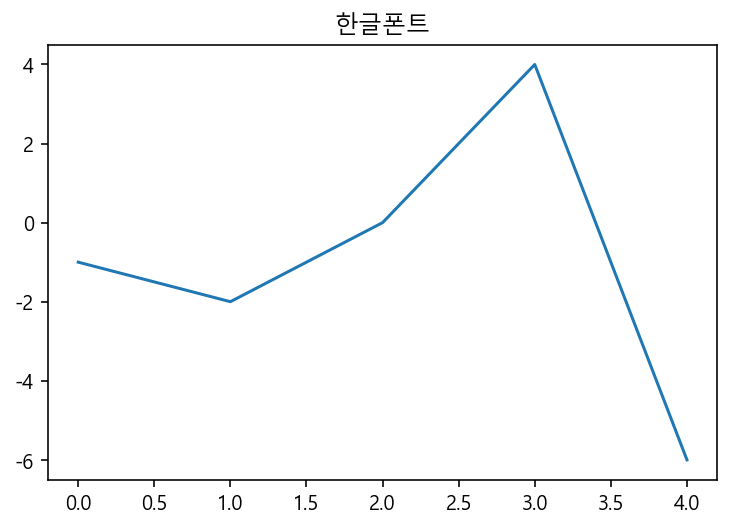

In [4]:
pd.Series([-1, -2, 0, 4, -6]).plot(title='한글폰트')

## 데이터셋 로드

In [5]:
# NHIS_OPEN_GJ_2017.CSV 을 1000 개로 샘플링을 해서 로드합니다. 이 때 random_state는 1을 사용합니다.
# df 변수에 담아 재사용 합니다.

df = pd.read_csv('data/NHIS_OPEN_GJ_2017.csv', encoding='cp949')
df = df.sample(1000, random_state=1).copy()
df.shape

(1000, 34)

## 데이터 전처리

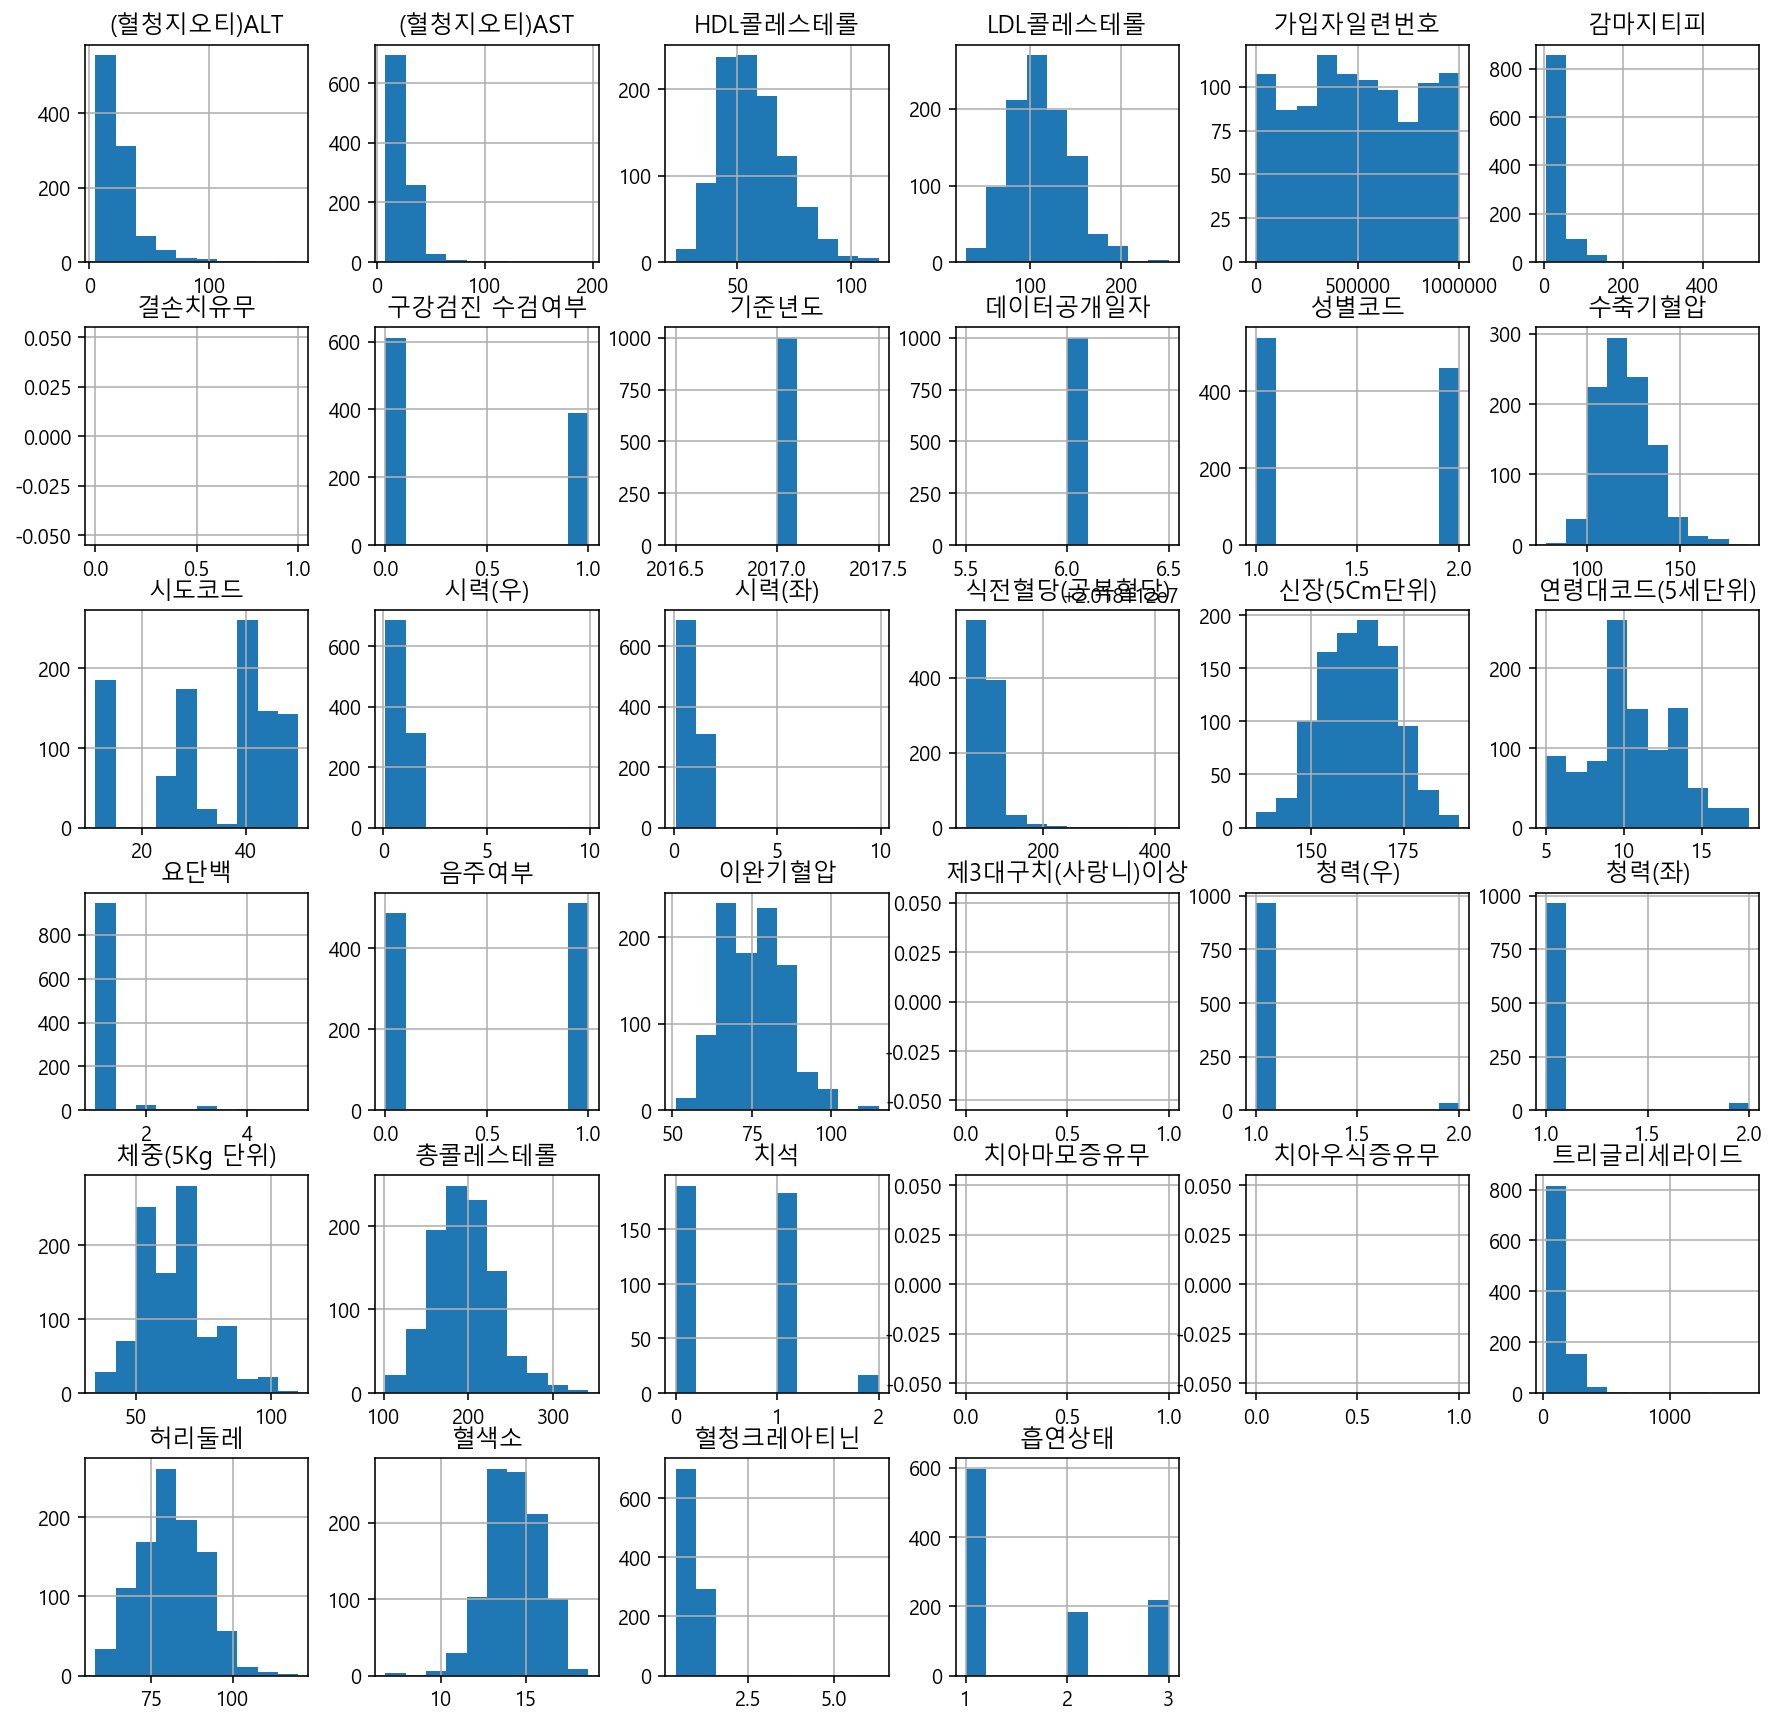

In [6]:
# 히스토그램으로 전체 변수 시각화 

h = df.hist(figsize=(15, 15))

In [7]:
# get_dummies로 "흡연상태"컬럼을 One Hot Encoding 

df_smoke = pd.get_dummies(df['흡연상태'],prefix='흡연상태')
print(df_smoke.shape)
df_smoke.head(1)

(1000, 3)


,흡연상태_1.0,흡연상태_2.0,흡연상태_3.0
276826,1,0,0


In [8]:
# 기존 데이터프레임에 merge로 one hot encoding 값을 합쳐주기

df = df.merge(df_smoke, left_on=df.index, right_on=df_smoke.index)
df[['흡연상태', '흡연상태_1.0', '흡연상태_2.0', '흡연상태_3.0']].head()

,흡연상태,흡연상태_1.0,흡연상태_2.0,흡연상태_3.0
0,1.0,1,0,0
1,1.0,1,0,0
2,3.0,0,0,1
3,1.0,1,0,0
4,1.0,1,0,0


In [9]:
df

,key_0,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),...,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자,흡연상태_1.0,흡연상태_2.0,흡연상태_3.0
0,276826,2017,276827,2,12,11,155.0,85.0,113.0,0.7,...,0,NaN,NaN,NaN,NaN,NaN,20181126,1,0,0
1,849425,2017,849426,2,15,11,155.0,45.0,73.0,0.5,...,1,NaN,NaN,NaN,NaN,0.0,20181126,1,0,0
2,504499,2017,504500,1,11,47,170.0,45.0,63.0,0.7,...,0,NaN,NaN,NaN,NaN,NaN,20181126,0,0,1
3,601054,2017,601055,2,16,26,150.0,50.0,77.0,0.4,...,0,NaN,NaN,NaN,NaN,NaN,20181126,1,0,0
4,980221,2017,980222,2,13,41,150.0,65.0,95.0,1.0,...,0,NaN,NaN,NaN,NaN,NaN,20181126,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,890013,2017,890014,2,11,29,155.0,50.0,65.1,1.0,...,1,NaN,NaN,NaN,NaN,1.0,20181126,0,1,0
996,875389,2017,875390,2,9,11,155.0,45.0,66.5,0.9,...,1,NaN,NaN,NaN,NaN,0.0,20181126,1,0,0
997,358458,2017,358459,2,11,11,160.0,50.0,72.0,0.9,...,0,NaN,NaN,NaN,NaN,NaN,20181126,1,0,0
998,808228,2017,808229,1,9,48,175.0,65.0,75.2,1.2,...,1,NaN,NaN,NaN,NaN,0.0,20181126,0,0,1


### 결측치 채우기
* 의미있는 값으로 채우면 분류 예측 결과가 더 좋아집니다.

In [10]:
df

,key_0,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),...,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자,흡연상태_1.0,흡연상태_2.0,흡연상태_3.0
0,276826,2017,276827,2,12,11,155.0,85.0,113.0,0.7,...,0,NaN,NaN,NaN,NaN,NaN,20181126,1,0,0
1,849425,2017,849426,2,15,11,155.0,45.0,73.0,0.5,...,1,NaN,NaN,NaN,NaN,0.0,20181126,1,0,0
2,504499,2017,504500,1,11,47,170.0,45.0,63.0,0.7,...,0,NaN,NaN,NaN,NaN,NaN,20181126,0,0,1
3,601054,2017,601055,2,16,26,150.0,50.0,77.0,0.4,...,0,NaN,NaN,NaN,NaN,NaN,20181126,1,0,0
4,980221,2017,980222,2,13,41,150.0,65.0,95.0,1.0,...,0,NaN,NaN,NaN,NaN,NaN,20181126,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,890013,2017,890014,2,11,29,155.0,50.0,65.1,1.0,...,1,NaN,NaN,NaN,NaN,1.0,20181126,0,1,0
996,875389,2017,875390,2,9,11,155.0,45.0,66.5,0.9,...,1,NaN,NaN,NaN,NaN,0.0,20181126,1,0,0
997,358458,2017,358459,2,11,11,160.0,50.0,72.0,0.9,...,0,NaN,NaN,NaN,NaN,NaN,20181126,1,0,0
998,808228,2017,808229,1,9,48,175.0,65.0,75.2,1.2,...,1,NaN,NaN,NaN,NaN,0.0,20181126,0,0,1


In [11]:
df = df.fillna(0)
df.isnull().sum()

key_0           0
기준년도            0
가입자일련번호         0
성별코드            0
연령대코드(5세단위)     0
시도코드            0
신장(5Cm단위)       0
체중(5Kg 단위)      0
허리둘레            0
시력(좌)           0
시력(우)           0
청력(좌)           0
청력(우)           0
수축기혈압           0
이완기혈압           0
식전혈당(공복혈당)      0
총콜레스테롤          0
트리글리세라이드        0
HDL콜레스테롤        0
LDL콜레스테롤        0
혈색소             0
요단백             0
혈청크레아티닌         0
(혈청지오티)AST      0
(혈청지오티)ALT      0
감마지티피           0
흡연상태            0
음주여부            0
구강검진 수검여부       0
치아우식증유무         0
결손치유무           0
치아마모증유무         0
제3대구치(사랑니)이상    0
치석              0
데이터공개일자         0
흡연상태_1.0        0
흡연상태_2.0        0
흡연상태_3.0        0
dtype: int64

## 학습, 예측에 사용할 컬럼

In [12]:
# feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 가져옵니다.

df.columns.tolist()

['key_0',
 '기준년도',
 '가입자일련번호',
 '성별코드',
 '연령대코드(5세단위)',
 '시도코드',
 '신장(5Cm단위)',
 '체중(5Kg 단위)',
 '허리둘레',
 '시력(좌)',
 '시력(우)',
 '청력(좌)',
 '청력(우)',
 '수축기혈압',
 '이완기혈압',
 '식전혈당(공복혈당)',
 '총콜레스테롤',
 '트리글리세라이드',
 'HDL콜레스테롤',
 'LDL콜레스테롤',
 '혈색소',
 '요단백',
 '혈청크레아티닌',
 '(혈청지오티)AST',
 '(혈청지오티)ALT',
 '감마지티피',
 '흡연상태',
 '음주여부',
 '구강검진 수검여부',
 '치아우식증유무',
 '결손치유무',
 '치아마모증유무',
 '제3대구치(사랑니)이상',
 '치석',
 '데이터공개일자',
 '흡연상태_1.0',
 '흡연상태_2.0',
 '흡연상태_3.0']

In [13]:
# feature_names 에 사용할 컬럼을 담아줍니다.
feature_names = [
 '성별코드',
 '연령대코드(5세단위)',
 '시도코드',
 '신장(5Cm단위)',
 '허리둘레',
 '시력(좌)',
 '시력(우)',
 '청력(좌)',
 '청력(우)',
 '수축기혈압',
 '이완기혈압',
 '식전혈당(공복혈당)',
 '총콜레스테롤',
 '트리글리세라이드',
 'HDL콜레스테롤',
 'LDL콜레스테롤',
 '혈색소',
 '요단백',
 '혈청크레아티닌',
 '(혈청지오티)AST',
 '(혈청지오티)ALT',
 '감마지티피',
 '흡연상태',
 '음주여부',
 '구강검진 수검여부',
 '치아우식증유무',
 '결손치유무',
 '치아마모증유무',
 '제3대구치(사랑니)이상',
 '치석',
 '데이터공개일자',
 '흡연상태_1.0',
 '흡연상태_2.0',
 '흡연상태_3.0']

## 정답값이자 예측해야 될 값

In [14]:
# label_name 이라는 변수에 예측할 컬럼의 이름을 담습니다.

label_name = '체중(5Kg 단위)'

## 학습, 예측 데이터셋 만들기

In [15]:
# X 변수에 feature_names 만 가져와 담습니다 => 시험범위 만들기

X = df[feature_names]
X.shape

(1000, 34)

In [16]:
# y 변수에 label_name 만 가져와 담습니다.

y = df[label_name]
y.shape

(1000,)

In [17]:
X

,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,...,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자,흡연상태_1.0,흡연상태_2.0,흡연상태_3.0
0,2,12,11,155.0,113.0,0.7,1.0,1.0,1.0,150.0,...,0,0.0,0.0,0.0,0.0,0.0,20181126,1,0,0
1,2,15,11,155.0,73.0,0.5,0.4,1.0,1.0,117.0,...,1,0.0,0.0,0.0,0.0,0.0,20181126,1,0,0
2,1,11,47,170.0,63.0,0.7,0.4,1.0,1.0,120.0,...,0,0.0,0.0,0.0,0.0,0.0,20181126,0,0,1
3,2,16,26,150.0,77.0,0.4,0.3,1.0,1.0,112.0,...,0,0.0,0.0,0.0,0.0,0.0,20181126,1,0,0
4,2,13,41,150.0,95.0,1.0,0.8,1.0,1.0,129.0,...,0,0.0,0.0,0.0,0.0,0.0,20181126,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,11,29,155.0,65.1,1.0,0.8,1.0,1.0,108.0,...,1,0.0,0.0,0.0,0.0,1.0,20181126,0,1,0
996,2,9,11,155.0,66.5,0.9,0.8,1.0,1.0,103.0,...,1,0.0,0.0,0.0,0.0,0.0,20181126,1,0,0
997,2,11,11,160.0,72.0,0.9,0.8,1.0,1.0,110.0,...,0,0.0,0.0,0.0,0.0,0.0,20181126,1,0,0
998,1,9,48,175.0,75.2,1.2,1.2,1.0,1.0,138.0,...,1,0.0,0.0,0.0,0.0,0.0,20181126,0,0,1


### StandardScaler 로 데이터 스케일 맞추기

In [18]:
from sklearn.preprocessing import StandardScaler

X_ = StandardScaler().fit(X).transform(X)
X_

array([[ 1.08129432,  0.51859135, -1.75182224, ...,  0.81990292,
        -0.47485808, -0.52798899],
       [ 1.08129432,  1.56766355, -1.75182224, ...,  0.81990292,
        -0.47485808, -0.52798899],
       [-0.92481759,  0.16890062,  1.05271374, ..., -1.21965659,
        -0.47485808,  1.89397887],
       ...,
       [ 1.08129432,  0.16890062, -1.75182224, ...,  0.81990292,
        -0.47485808, -0.52798899],
       [-0.92481759, -0.53048084,  1.13061752, ..., -1.21965659,
        -0.47485808,  1.89397887],
       [ 1.08129432,  0.86828208,  0.66319486, ...,  0.81990292,
        -0.47485808, -0.52798899]])

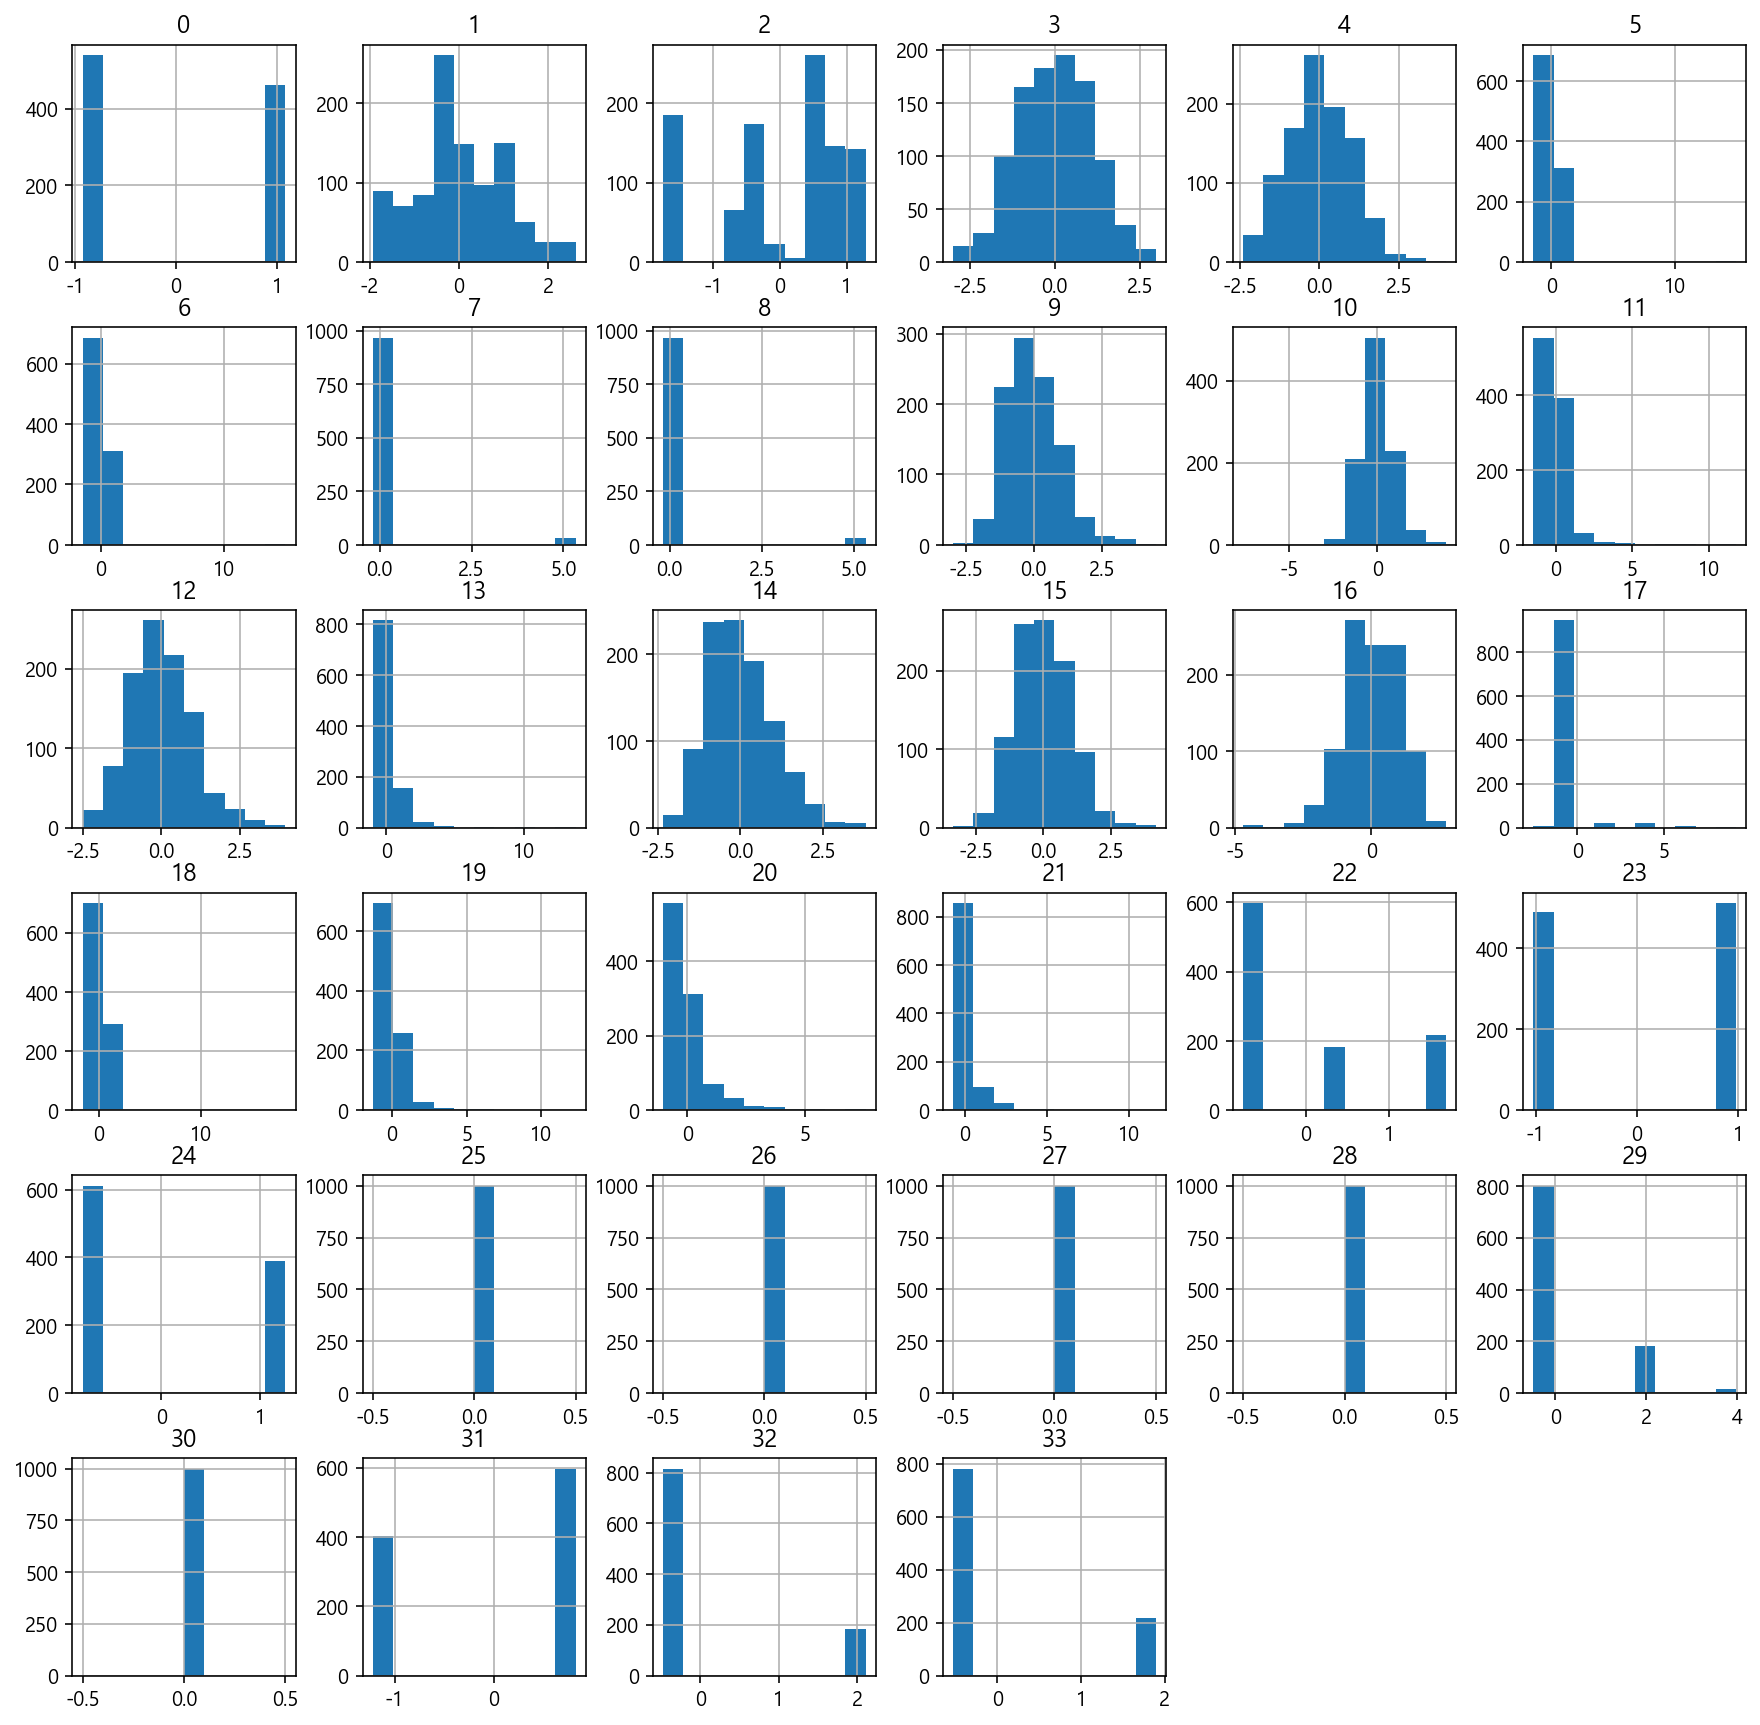

In [19]:
# 스케일링이 잘 되었는지 히스토그램으로 확인
h = pd.DataFrame(X_).hist(figsize=(15,15))

In [20]:
# model_selection을 통해 데이터를 나눕니다.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2, random_state=42)

### 학습세트와 테스트세트가 잘 만들어졌는지 확인

In [21]:
print(X_test.shape)
X_test[:1]

(200, 34)


array([[ 1.08129432,  0.16890062, -1.75182224, -0.82050971, -0.23397647,
        -1.1280739 , -1.13705576, -0.1876078 , -0.1876078 , -0.91660545,
         0.20683754, -0.25082244,  0.42732545,  1.01262495, -0.61869898,
         0.08349401, -0.29367354, -0.19639038, -0.24906291, -0.41508166,
        -0.32994021, -0.51593007, -0.75654775, -1.02224741, -0.79791053,
         0.        ,  0.        ,  0.        ,  0.        , -0.47982585,
         0.        ,  0.81990292, -0.47485808, -0.52798899]])

In [23]:
# 학습 세트 예) 기출문제
print(X_train.shape)
X_train[:1]

(800, 34)


array([[ 1.08129432, -0.53048084, -1.75182224, -0.82050971,  0.0751346 ,
        -0.62394434, -0.46354428,  5.33026873, -0.1876078 , -0.43753145,
         0.20683754, -0.43318571,  1.28773029, -0.56425593,  2.48134047,
         0.70680518, -0.66667127, -0.19639038, -0.92039151,  0.37940212,
         0.43416403, -0.39451762,  0.46369056, -1.02224741, -0.79791053,
         0.        ,  0.        ,  0.        ,  0.        , -0.47982585,
         0.        , -1.21965659,  2.10589235, -0.52798899]])

In [24]:
# 정답 값을 만들어 줍니다. 예) 기출문제의 정답
print(y_train.shape)

(800,)


In [26]:
# 예측에 사용할 데이터세트를 만듭니다. 예) 실전 시험 문제
print(y_test.shape)
y_test.head()

(200,)


521     60.0
737     55.0
740    100.0
660     65.0
411     50.0
Name: 체중(5Kg 단위), dtype: float64

In [27]:
# 예측의 정답값 예) 실전 시험 문제의 정답
y_test.head()

521     60.0
737     55.0
740    100.0
660     65.0
411     50.0
Name: 체중(5Kg 단위), dtype: float64

## 머신러닝 알고리즘 가져오기
1. 의사결정나무 사용하기
1. 랜덤포레스트 사용하기
1. 그라디언트 부스팅 사용하기

In [ ]:
# 의사결정나무를 사용합니다.
# from sklearn.tree import DecisionTreeRegressor

# model = DecisionTreeRegressor(random_state=42)
# model

[3.2.4.3.2. sklearn.ensemble.RandomForestRegressor — scikit-learn 0.22.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor)

In [29]:
# 랜덤포레스트를 사용합니다.
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=1000, random_state=42, n_jobs=-1)
model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
# 그라디언트 부스팅을 사용합니다.
# 오차를 다음 샘플에 반영함 (오류값을 계속 보정해주는 모델링)
# from sklearn.ensemble import GradientBoostingRegressor

# model = GradientBoostingRegressor(random_state=42)
# model

### 파라메터 튜닝과 교차검증(Cross validation)
<img src="https://i.stack.imgur.com/padg4.gif"> 

[6.3. Preprocessing data — scikit-learn 0.22.2 documentation](https://scikit-learn.org/stable/modules/preprocessing.html)

In [30]:
model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [31]:
# RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
# 트리의 갯수
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
# 피처를 나눌 비율
max_features = ['auto', 'sqrt']
# 트리의 깊이
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# 트리의 깊이에 기본값도 추가합니다.
max_depth.append(None)
# 최소 분할 샘플의 수
min_samples_split = [2, 5, 10]
# leaf 노드의 최소 샘플 수
min_samples_leaf = [1, 2, 4]
# 샘플 추출 방법
bootstrap = [True, False]

# 랜덤 그리드 만들기
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

random_grid

{'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [32]:
# RandomizedSearchCV 에 cv 옵션을 주어 교차검증을 합니다.
rf_random = RandomizedSearchCV(estimator = model, 
                               param_distributions = random_grid, 
                               n_iter = 15, # 반복 수
                               cv = 5, # fold를 몇개로 나눌 것인지 (cross_validation)
                               random_state=42, 
                               n_jobs = -1)

##  학습과 예측
### 학습(훈련)
* 시험을 볼 때 기출문제(X_train)와 정답(y_train)을 보고 공부하는 과정과 유사합니다.

In [33]:
# RandomizedSearchCV 에서 만든 파라메터 값으로 학습을 합니다.

rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=1000, n_jobs=-1,
                  

In [34]:
# rank_test_score 로 정렬을 해서 cv_results_ 로 결과 리포트를 봅니다.

pd.DataFrame(rf_random.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9,5.844982,0.610885,0.525241,0.316628,1000,5,2,auto,50,True,"{'n_estimators': 1000, 'min_samples_split': 5,...",0.833061,0.829881,0.747762,0.841862,0.804708,0.811455,0.034156,1
8,2.817183,0.303004,0.224947,0.084760,644,2,4,auto,100,True,"{'n_estimators': 644, 'min_samples_split': 2, ...",0.830007,0.830092,0.744899,0.840644,0.807514,0.810631,0.034599,2
11,2.437917,0.601504,0.143441,0.041132,466,2,1,sqrt,20,False,"{'n_estimators': 466, 'min_samples_split': 2, ...",0.744595,0.786041,0.662549,0.753981,0.751482,0.739730,0.041150,3
5,1.188952,0.134810,0.368597,0.298662,288,10,1,sqrt,60,False,"{'n_estimators': 288, 'min_samples_split': 10,...",0.737252,0.786414,0.652691,0.745708,0.738668,0.732147,0.043614,4
13,1.771731,0.247101,0.243351,0.025638,644,10,2,sqrt,70,False,"{'n_estimators': 644, 'min_samples_split': 10,...",0.735373,0.782559,0.642524,0.736960,0.742550,0.727993,0.046107,5
14,2.210210,0.120412,0.186701,0.041503,822,2,4,sqrt,110,False,"{'n_estimators': 822, 'min_samples_split': 2, ...",0.732360,0.782534,0.644988,0.735105,0.738941,0.726785,0.044826,6
3,2.690327,0.348667,0.317696,0.111943,733,5,1,sqrt,30,True,"{'n_estimators': 733, 'min_samples_split': 5, ...",0.733075,0.780586,0.636057,0.738247,0.730583,0.723710,0.047464,7
12,1.623301,0.118557,0.112474,0.006248,555,5,1,sqrt,70,True,"{'n_estimators': 555, 'min_samples_split': 5, ...",0.731430,0.777393,0.633549,0.734470,0.728845,0.721137,0.047285,8
1,1.053260,0.377468,0.203078,0.134016,377,10,4,sqrt,90,False,"{'n_estimators': 377, 'min_samples_split': 10,...",0.727200,0.776992,0.634459,0.730174,0.733680,0.720501,0.046704,9
7,1.322617,0.774867,1.242439,0.891603,200,5,2,sqrt,10,True,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.726113,0.770269,0.627171,0.728950,0.727082,0.715917,0.047389,10


In [35]:
# 가장 좋은 파라메터를 찾습니다.

rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': True}

In [36]:
# 가장 좋은 파라메터로 만든 estimator 를 찾습니다.
model = rf_random.best_estimator_
model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [37]:
# 교차검증으로 값을 비교해 봅니다.
from sklearn.model_selection import cross_val_predict
y_cv_predict = cross_val_predict(model, X_train, y_train, cv=10)
y_cv_predict[:5]

array([62.86245375, 59.17282341, 63.29404744, 47.11535606, 64.41046861])

In [38]:
# 위에서 구한 교차검증으로 오차값의 평균을 구합니다.
abs(y_train - y_cv_predict).mean()

4.181544344995283

### 찾은 파라메터로 학습과 예측

In [39]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

### 예측
* 실전 시험문제(X_test)라고 보면 됩니다. 우리가 정답을 직접 예측합니다.

In [40]:
y_predict = model.predict(X_test)
y_predict[:5]

array([57.24953824, 63.224761  , 94.55766574, 67.67992995, 54.50862734])

## 트리 알고리즘 분석하기
* 의사결정나무를 시각화 합니다.

In [ ]:
# from sklearn.tree import plot_tree
# from sklearn.tree import export_graphviz

# plt.figure(figsize=(20, 15))
# tree = plot_tree(model, 
#                  feature_names=feature_names,
#                  fontsize=10)

In [ ]:
# import graphviz
# from sklearn.tree import export_graphviz

# dot_tree = export_graphviz(model,
#                            feature_names = feature_names,
#                            filled=True)
# graphviz.Source(dot_tree)

In [41]:
# 피처의 중요도를 추출하기

feature_importance = model.feature_importances_
feature_importance[:5]

array([0.00561003, 0.0305559 , 0.00663459, 0.19253434, 0.63534179])

## 피처의 중요도 시각화

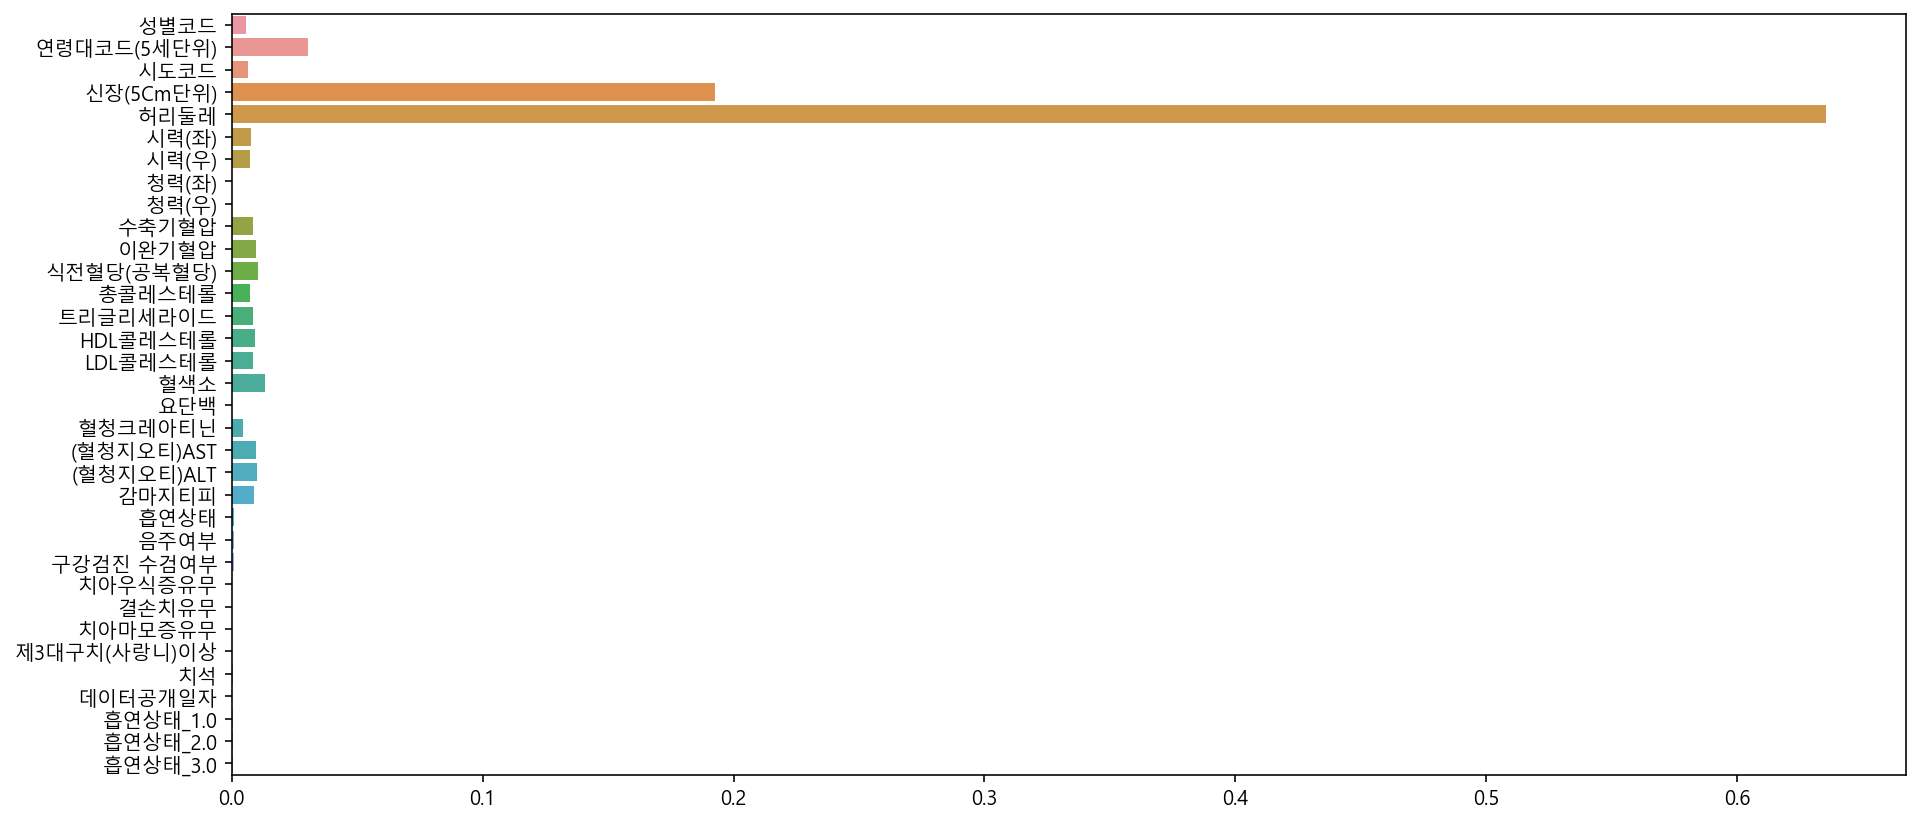

In [42]:
# 피처의 중요도 시각화 하기
plt.figure(figsize=(15,7))
sns.barplot(x=feature_importance, y=feature_names)

## 예측값과 실제값 비교하기

In [43]:
# 데이터프레임으로 실제값, 예측값, 오류값을 만들기
error = pd.DataFrame({'test' : y_test, 'predict' : y_predict})
error['error'] = abs(error['test'] - error['predict'])
error.head()

,test,predict,error
521,60.0,57.249538,2.750462
737,55.0,63.224761,8.224761
740,100.0,94.557666,5.442334
660,65.0,67.679930,2.679930
411,50.0,54.508627,4.508627


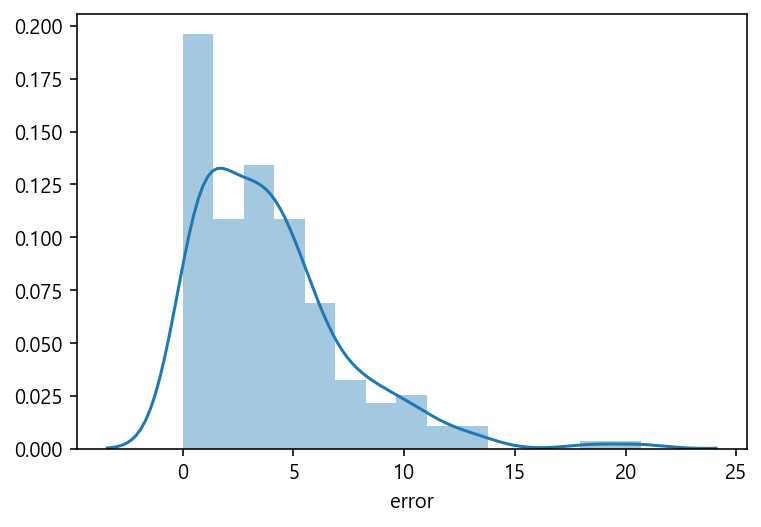

In [44]:
sns.distplot(error['error'])

In [45]:
(y_test == y_predict).sum()

0

### 정확도(MAE) 측정하기

In [46]:
model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [47]:
# dicision tree : 5.275
# random forest : 4.068 - 100개
# random forest : 3.986 - 1000개
# gradient boosting : 3.94
diff_count = abs(y_test - y_predict).mean()
diff_count

3.9841400297619054

In [48]:
# 실제값 - 예측값을 빼주면 같은 값은 0으로 나오게 됩니다. 
# 여기에서 절대값을 씌운 값이 1인 값이 다르게 예측한 값이 됩니다.
# diff_count 에 값을 넣어줍니다.



In [49]:
# 위에서 처럼 직접 구할 수도 있지만 미리 구현된 알고리즘을 가져와 사용합니다.

from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_predict)

3.9841400297619054

### RMSE
* [평균 제곱근 편차 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%ED%8F%89%EA%B7%A0_%EC%A0%9C%EA%B3%B1%EA%B7%BC_%ED%8E%B8%EC%B0%A8)

In [50]:
# 6.901 DT
# 5.336 RF
np.sqrt(pow((y_test - y_predict),2).mean())

5.217869217973848

In [51]:
np.sqrt(((y_test - y_predict) ** 2).mean())


5.217869217973848

In [52]:
from sklearn.metrics import mean_squared_error

score = mean_squared_error(y_test, y_predict)
print(score)
rmse = np.sqrt(score)
rmse

27.22615917587903


5.217869217973849

### MAPE
* [Mean absolute percentage error - Wikipedia](https://en.wikipedia.org/wiki/Mean_absolute_percentage_error)
* 예측값과 실제값의 차이를 실제값과 나눠주고 평균을 구합니다.

In [53]:
# 8.53322 DT
# 6.73912 RF
round(abs((y_test - y_predict) / y_test).mean() * 100, 2)

6.58

### 시각화로 실제값과 예측값 비교하기

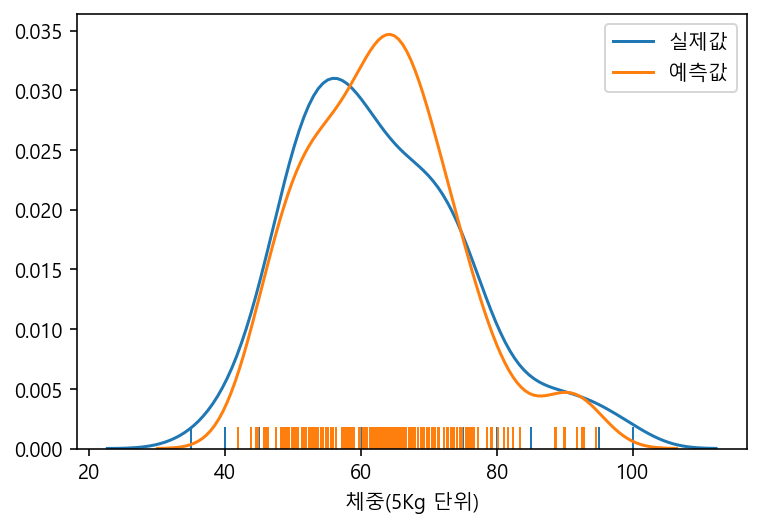

In [54]:
# 실제값과 예측값이 얼마나 차이가 나는지 비교해 봅니다.

sns.distplot(y_test, hist=False, rug=True, label='실제값')
sns.distplot(y_predict, hist=False, rug=True, label='예측값')